In [169]:
# Losev Ivan 19 IAD
#
# Dataset: https://archive.ics.uci.edu/ml/datasets/Abalone
# Num of Attributes: 9
# Num of Instances 4177
#
# Task: Classification
# Goal: Predict the age of abalone from physical measurements

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [171]:
df  = pd.read_csv(os.getcwd() + '\\abalone.data', header=None)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

print(df.shape)
df.head()

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Данные представлены 4177 строками, каждая из которых содержит 9 признаков:
1) Пол -  {M, F, I}, распределён равномерно
2) Физические характеристики - Length, Diameter, ... Shell weight, представленные типом float
3) Целевой параметер - Rings, который необходимо предсказазть (int)

In [172]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

После добавления пропусков нужно их устранить.
Для этого заменим пропуски средними значениями.

Кроме того уберём данные, в которых неизвестен пол.

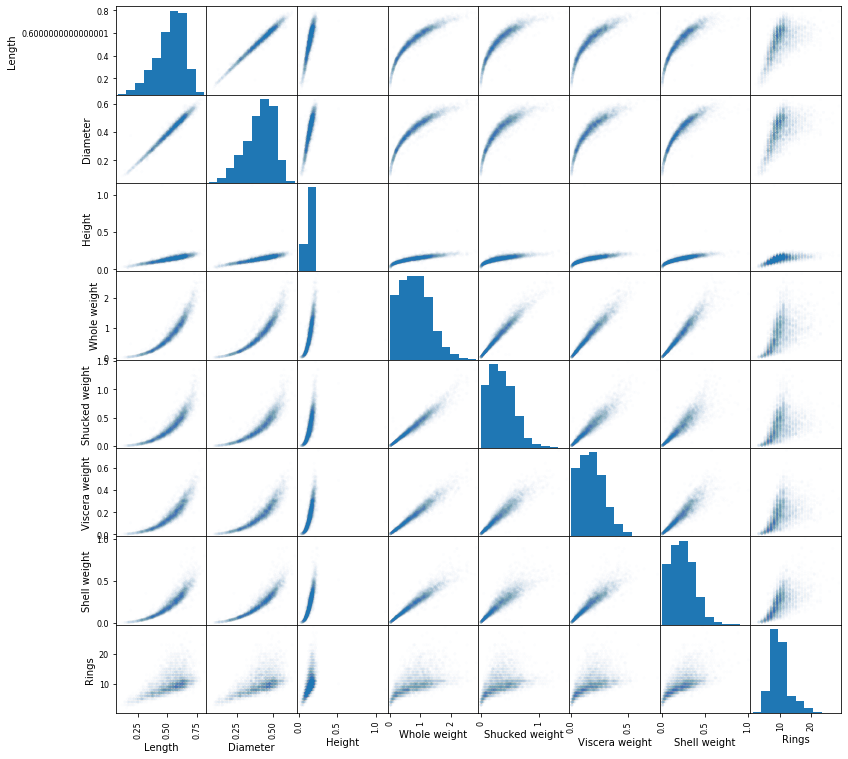

In [173]:
pd.plotting.scatter_matrix(df, alpha = .01, figsize = (13, 13))
pass

Рассматривая матрицу можно заметить, что, например, зависимость между Length и Shucked weight и Diameter и Whole weight похожа на квадратичную. Также, многие графии с Height похожи на график квадратного корня.

Кроме того, интересно количество колец. Как видно на графике, большое кол-во значений превышает значение 10.

In [174]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Глядя на таблицу можно заметить, что существует высокая корреляция между физическими параметрами (> 0,8)
При этом, корреляция между количеством колец и остальными параметрами заметно ниже (0,4-0,6)

In [175]:
for columnName in df.columns:
    if isinstance(df[columnName][0], str):
        print('{0:20}{1}'.format(columnName, ' contains string'))
    elif columnName != 'Rings':
        print('Mean   of {0:17} {1:.5}'.format(columnName + ':', df[columnName].mean()))
        print('Median of {0:17} {1:.5}'.format(columnName + ':', df[columnName].median()))
        print('Min    of {0:17} {1:.5}'.format(columnName + ':', df[columnName].min()))
        print('Max    of {0:17} {1:.5}'.format(columnName + ':', df[columnName].max()))
    else:
        print('Mean   of {0:17} {1:.5}'.format(columnName + ':', df[columnName].mean()))
        print('Median of {0:17} {1:.5}'.format(columnName + ':', df[columnName].median()))
        
    print('{:*^40}'.format(''))

Sex                  contains string
****************************************
Mean   of Length:           0.52399
Median of Length:           0.545
Min    of Length:           0.075
Max    of Length:           0.815
****************************************
Mean   of Diameter:         0.40788
Median of Diameter:         0.425
Min    of Diameter:         0.055
Max    of Diameter:         0.65
****************************************
Mean   of Height:           0.13952
Median of Height:           0.14
Min    of Height:           0.0
Max    of Height:           1.13
****************************************
Mean   of Whole weight:     0.82874
Median of Whole weight:     0.7995
Min    of Whole weight:     0.002
Max    of Whole weight:     2.8255
****************************************
Mean   of Shucked weight:   0.35937
Median of Shucked weight:   0.336
Min    of Shucked weight:   0.001
Max    of Shucked weight:   1.488
****************************************
Mean   of Viscera weight:   0.

Можно предположить, что распределения значений признаков похоже на Гаусовское распределение, сдвинутое влево или вправо, поскольку медиана совпадает со средним, но при этом они находятся не в середине распределение.

Рассмотрим это на примере Viscera weight:

0-----0.17-0.18---------------------------------------------------0.76

0.17 - Median

0.18 - Mean

Num of Rings in [7-11]:  2769 / 4177 (66.29159683983721 %)
Num of Rings in [5-7) & (11, 15]:  1073 / 4177 (25.68829303327747 %)


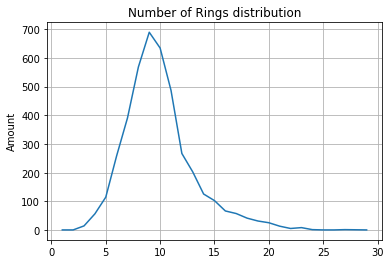

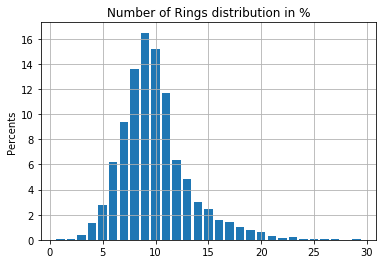

In [176]:
ringNumbers = np.sort(df['Rings'].unique())
ringNumberCounts = []
ringNumberPercents = []
for ringNum in ringNumbers:
    ringNumberCounts.append(df[df['Rings'] == ringNum]['Rings'].count())
    ringNumberPercents.append(ringNumberCounts[-1] / df['Rings'].count() * 100)

fig1, plt1 = plt.subplots()
plt1.plot(ringNumbers, ringNumberCounts)
plt1.set(title='Number of Rings distribution', ylabel='Amount')
plt1.grid()


fig2, plt2 = plt.subplots()
plt2.bar(ringNumbers, ringNumberPercents)
plt2.set(title='Number of Rings distribution in %', ylabel='Percents')
plt2.grid()

a = df[(df['Rings'] >= 7) & (df['Rings'] <= 11)]['Rings'].count()
b = df['Rings'].count()
print('Num of Rings in [7-11]: ', a, '/', b, '(' + str(a / b * 100) + ' %)') 

a = df[(df['Rings'] >= 5) & (df['Rings'] < 7) | (df['Rings'] > 11) & (df['Rings'] <= 15)]['Rings'].count()
b = df['Rings'].count()
print('Num of Rings in [5-7) & (11, 15]: ', a, '/', b, '(' + str(a / b * 100) + ' %)') 

Как видно на графиках, большинство объектов исследования имеют от 7 до 11 колец (> 66%)

Также можно выделить объекты с количеством колец от 5 до 7 и от 11 до 15. Их количество составляет 25% от общего числа.

На оставшиеся 9% приходятся объекты с количеством колец меньше 5 и больше 15

In [177]:
df.describe(include = 'all').drop(['Sex'], axis=1)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


Выполним нормализацию физических параметров и заменим признак Sex на 3 бинарных (F, I, M)

In [178]:
numerical_data = df.drop(['Sex', 'Rings'], axis=1)
numerical_data = (numerical_data - numerical_data.mean(axis = 0))/numerical_data.std(axis = 0)
                               
                               
clear_df = pd.concat([pd.get_dummies(df['Sex']), numerical_data, df['Rings']], axis=1)
clear_df.head()

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0,1,-0.574489,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140,15
1,0,0,1,-1.448812,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842,7
2,1,0,0,0.050027,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114,9
3,0,0,1,-0.699393,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222,10
4,0,1,0,-1.615350,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599,7


In [179]:
X = clear_df.drop('Rings', axis=1)
y = clear_df['Rings']
feature_names = X.columns

print(y.describe())

X = X.values
y = y.values


print(X.shape, type(X))
print(y.shape, type(y))
N, d = X.shape

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64
(4177, 10) <class 'numpy.ndarray'>
(4177,) <class 'numpy.ndarray'>


Подготовим данные для предсказания признака Rings. Также сформирует тестовую и тренировочную выборки

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3341 836


In [181]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)


y_test_predict = knn.predict(X_test)
test_err = 1 - knn.score(X_test, y_test)
print('test error: ', test_err)

test error:  0.7631578947368421


Как видно, метод ближайших соседей с n == 11 работает очень плохо.

In [182]:
from sklearn.model_selection import GridSearchCV

nnb = np.arange(1, 51, 2)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('Best cv err:', best_cv_err, '\nBest parameter', best_n_neighbors)


D:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Best cv err: 0.7410954803950913 
Best parameter 37


D:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [183]:

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Train error:', err_train, '\nTest  error:', err_test)


Train error: 0.6908111343909009 
Test  error: 0.7200956937799043


Используя GridSearch находим оптимальное значение параметра - 37

In [184]:

from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Train error:', err_train, '\nTest  error:', err_test)

Train error: 0.0 
Test  error: 0.7464114832535885


Ошибка на методу RandomForest составила 75%

In [185]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'Shell weight' (0.164856)
 2. feature 'Shucked weight' (0.153829)
 3. feature 'Viscera weight' (0.148735)
 4. feature 'Whole weight' (0.146737)
 5. feature 'Diameter' (0.115423)
 6. feature 'Length' (0.114708)
 7. feature 'Height' (0.102970)
 8. feature '    M' (0.019087)
 9. feature '    F' (0.017965)
10. feature '    I' (0.015692)


Попробуем теперь разделить признаки на несколько групп и повторить эксперементы

In [260]:
def KNN_RF_with_stat(RESULT_MAP, RES_MAP_NAME, title, X, y, isPCA=False):
    print("\n" + title + '\n' + RES_MAP_NAME + ':\n')
    
    feature_names = 0
    if isPCA == False:
        feature_names = X.columns

        X = X.values
        y = y.values

    # --------------------- Split data on train and test ---------------------------------------------------

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    N_train, _ = X_train.shape 
    N_test,  _ = X_test.shape 
    N, d = X.shape

    # -------------------------   KNeighborsClassifier       -----------------------------------------------

    knn = KNeighborsClassifier(n_neighbors = 11)
    knn.fit(X_train, y_train)


    y_test_predict = knn.predict(X_test)
    test_err = round(1 - knn.score(X_test, y_test), 4)
    print('KNeighborsClassifier test error: ', test_err)

    # -------------------------          GridSearchCV        -----------------------------------------------

    nnb = np.arange(1, 51, 2)
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
    grid.fit(X_train, y_train)

    best_cv_err = round(1 - grid.best_score_, 4)
    best_n_neighbors = grid.best_estimator_.n_neighbors
    print('GridSearchCV: ', best_cv_err, best_n_neighbors)

    # -------------------------   KNeighborsClassifier       -----------------------------------------------

    knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

    err_train = round(np.mean(y_train != knn.predict(X_train)), 4)
    err_test  = round(np.mean(y_test  != knn.predict(X_test)), 4)

    print('KNeighborsClassifier: ', err_train, err_test)
    RESULT_MAP[RES_MAP_NAME] = {
                     'KNN':{},
                     'RF':{}
                 }
    RESULT_MAP[RES_MAP_NAME]['KNN']['train'] = err_train
    RESULT_MAP[RES_MAP_NAME]['KNN']['test'] = err_test

    # -------------------------   RandomForestClassifier      -----------------------------------------------

    rf = ensemble.RandomForestClassifier(n_estimators = 1000)
    rf.fit(X_train, y_train)

    err_train = round(np.mean(y_train != rf.predict(X_train)), 4)
    err_test  = round(np.mean(y_test  != rf.predict(X_test)), 4)

    print('RandomForestClassifier: ', err_train, err_test)
    RESULT_MAP[RES_MAP_NAME]['RF']['train'] = err_train
    RESULT_MAP[RES_MAP_NAME]['RF']['test'] = err_test

    if isPCA == False:
        importances = rf.feature_importances_
        indices = np.argsort(importances)[::-1]

        print("Feature ranking:")

        for f in range(d):
            print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

In [187]:
df2 = clear_df.copy()

df2.at[df2['Rings'] < 5, 'Rings'] = 0
df2.at[(df2['Rings'] >= 5)  & (df2['Rings'] < 10), 'Rings'] = 1
df2.at[(df2['Rings'] >= 10) & (df2['Rings'] < 15), 'Rings'] = 2
df2.at[(df2['Rings'] >= 15) & (df2['Rings'] < 20), 'Rings'] = 3
df2.at[df2['Rings'] >= 20, 'Rings'] = 4

X = df2.drop('Rings', axis=1)
y = df2['Rings']

RESULT_MAP = {}
KNN_RF_with_stat(RESULT_MAP, 'First_train', 'Grouped by 0-5 5-10 10-15 15-20 20+', X, y)


Grouped by 0-5 5-10 10-15 15-20 20+
First_train:

KNeighborsClassifier test error:  0.3242
GridSearchCV:  0.3053 31
KNeighborsClassifier:  0.2849 0.3086
RandomForestClassifier:  0.0 0.3278
Feature ranking:
 1. feature 'Shell weight' (0.209341)
 2. feature 'Viscera weight' (0.149220)
 3. feature 'Whole weight' (0.147060)
 4. feature 'Shucked weight' (0.139947)
 5. feature 'Height' (0.108976)
 6. feature 'Diameter' (0.096808)
 7. feature 'Length' (0.094173)
 8. feature '    I' (0.027504)
 9. feature '    F' (0.014496)
10. feature '    M' (0.012475)


Как видно, выбранное разбиение улучшило предсказание. Попробуем разделить на группы, опираясь на распределение признака

In [188]:
df2 = clear_df.copy()

df2.at[df2['Rings'] < 7, 'Rings'] = 0
df2.at[(df2['Rings'] >= 7)  & (df2['Rings'] < 12), 'Rings'] = 1
df2.at[(df2['Rings'] >= 12) & (df2['Rings'] < 16), 'Rings'] = 2
df2.at[(df2['Rings'] >= 16) & (df2['Rings'] < 20), 'Rings'] = 3
df2.at[df2['Rings'] >= 20, 'Rings'] = 4

X = df2.drop('Rings', axis=1)
y = df2['Rings']

KNN_RF_with_stat(RESULT_MAP, 'With sex', 'Grouped by 0-7 7-12 12-16 16-20 20+', X, y)


Grouped by 0-7 7-12 12-16 16-20 20+
With sex:

KNeighborsClassifier test error:  0.2739
GridSearchCV:  0.2894 13
KNeighborsClassifier:  0.2628 0.2727
RandomForestClassifier:  0.0 0.2727
Feature ranking:
 1. feature 'Shell weight' (0.195705)
 2. feature 'Shucked weight' (0.159881)
 3. feature 'Whole weight' (0.153288)
 4. feature 'Viscera weight' (0.134157)
 5. feature 'Diameter' (0.112591)
 6. feature 'Length' (0.105395)
 7. feature 'Height' (0.097503)
 8. feature '    I' (0.015061)
 9. feature '    M' (0.013526)
10. feature '    F' (0.012893)


Продолжив эксперементы можно подобрать оптимальную группировку колец.

Сейчас же стоит обратить внимание на то, что в дереве решение значения пола почти не влияли на результат, поэтому попробуем их убрать

In [189]:
df2 = clear_df.copy()

df2.at[df2['Rings'] < 7, 'Rings'] = 0
df2.at[(df2['Rings'] >= 7)  & (df2['Rings'] < 12), 'Rings'] = 1
df2.at[(df2['Rings'] >= 12) & (df2['Rings'] < 16), 'Rings'] = 2
df2.at[(df2['Rings'] >= 16) & (df2['Rings'] < 20), 'Rings'] = 3
df2.at[df2['Rings'] >= 20, 'Rings'] = 4

X = df2.drop(['Rings', 'I', 'M', 'F'], axis=1)
y = df2['Rings']


KNN_RF_with_stat(RESULT_MAP, 'Without sex', 'Grouped by 0-7 7-12 12-16 16-20 20+', X, y)


Grouped by 0-7 7-12 12-16 16-20 20+
Without sex:

KNeighborsClassifier test error:  0.2763
GridSearchCV:  0.287 43
KNeighborsClassifier:  0.2828 0.2656
RandomForestClassifier:  0.0 0.2739
Feature ranking:
 1. feature 'Shell weight' (0.196897)
 2. feature 'Shucked weight' (0.164703)
 3. feature 'Whole weight' (0.162428)
 4. feature 'Viscera weight' (0.147924)
 5. feature 'Diameter' (0.116324)
 6. feature 'Length' (0.110173)
 7. feature 'Height' (0.101552)


Task 2 -------------------------------------------------------------------------------

<font size="5">Task 2 -------------------------------------------------------------------------------</font>

Как видно на графике, после удаления признака "Sex" ошибка на тесте немного уменьшилась.
Рассматривая матрицу кореляции можно заметить что корреляция между Length и Diameter больше 0.98 поэтому имеет смысл удалить один из них

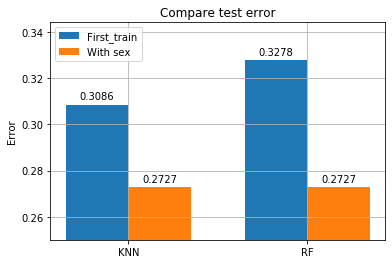

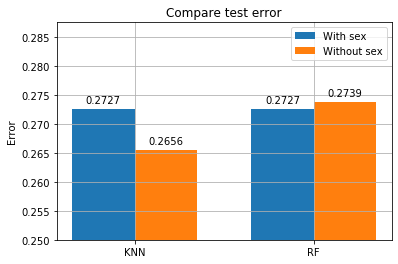

In [196]:
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def compare_KNN_RF(RESULT_MAP, KEY_A, KEY_B, yMinLim=0.0, isTest=True):
    labels = RESULT_MAP[KEY_A].keys()

    err_target = 'test'
    if isTest == False:
        err_target = 'train'

    x = np.arange(len(labels))  # the label locations

    y_values = {}
    for type_name in RESULT_MAP:
        y_values[type_name] = []
        for method in RESULT_MAP[type_name]:
            y_values[type_name].append(RESULT_MAP[type_name][method]['test'])

    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, y_values[KEY_A], width, label=KEY_A)
    rects2 = ax.bar(x + width/2, y_values[KEY_B], width, label=KEY_B)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    if yMinLim != 0.0:
        ax.set_ylim(ymin=yMinLim)
    ax.set_ylabel('Error')
    ax.set_title('Compare ' + err_target + ' error')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='best')
    plt.grid(True)
    
    autolabel(rects1, ax)
    autolabel(rects2, ax)

compare_KNN_RF(RESULT_MAP, 'First_train', 'With sex', 0.25)
compare_KNN_RF(RESULT_MAP, 'With sex', 'Without sex', 0.25)


Grouped by 0-7 7-12 12-16 16-20 20+
Without Sex&Len:

KNeighborsClassifier test error:  0.2739
GridSearchCV:  0.2873 23
KNeighborsClassifier:  0.2736 0.2703
RandomForestClassifier:  0.0 0.2679
Feature ranking:
 1. feature 'Shell weight' (0.216669)
 2. feature 'Shucked weight' (0.189107)
 3. feature 'Whole weight' (0.182972)
 4. feature 'Viscera weight' (0.165829)
 5. feature 'Diameter' (0.135289)
 6. feature 'Height' (0.110134)


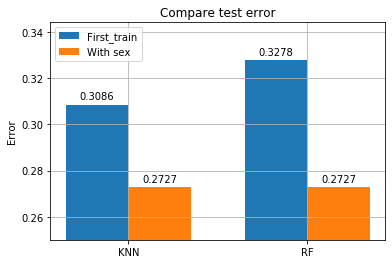

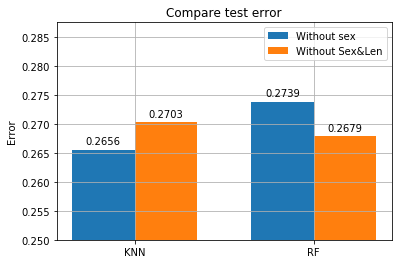

In [193]:
df2 = clear_df.copy()

df2.at[df2['Rings'] < 7, 'Rings'] = 0
df2.at[(df2['Rings'] >= 7)  & (df2['Rings'] < 12), 'Rings'] = 1
df2.at[(df2['Rings'] >= 12) & (df2['Rings'] < 16), 'Rings'] = 2
df2.at[(df2['Rings'] >= 16) & (df2['Rings'] < 20), 'Rings'] = 3
df2.at[df2['Rings'] >= 20, 'Rings'] = 4


X = df2.drop(['Rings', 'I', 'M', 'F', 'Length'], axis=1)
y = df2['Rings']


KNN_RF_with_stat(RESULT_MAP, 'Without Sex&Len', 'Grouped by 0-7 7-12 12-16 16-20 20+', X, y)

compare_KNN_RF(RESULT_MAP, 'Without sex', 'Without Sex&Len', 0.25)

Результат KNN немного ухудшился, тогда как ошибка на RF наоборот уменьшилась


Grouped by 0-7 7-12 12-16 16-20 20+
Without Sex&Len&SWei:

KNeighborsClassifier test error:  0.2919
GridSearchCV:  0.2933 29
KNeighborsClassifier:  0.2861 0.2799
RandomForestClassifier:  0.0 0.2919
Feature ranking:
 1. feature 'Shell weight' (0.263409)
 2. feature 'Whole weight' (0.233005)
 3. feature 'Viscera weight' (0.210305)
 4. feature 'Diameter' (0.166462)
 5. feature 'Height' (0.126818)


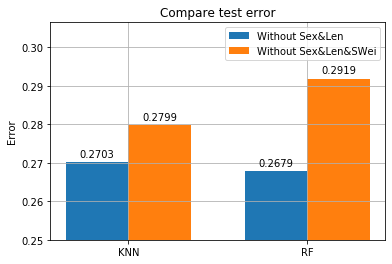

In [195]:
df2 = clear_df.copy()

df2.at[df2['Rings'] < 7, 'Rings'] = 0
df2.at[(df2['Rings'] >= 7)  & (df2['Rings'] < 12), 'Rings'] = 1
df2.at[(df2['Rings'] >= 12) & (df2['Rings'] < 16), 'Rings'] = 2
df2.at[(df2['Rings'] >= 16) & (df2['Rings'] < 20), 'Rings'] = 3
df2.at[df2['Rings'] >= 20, 'Rings'] = 4


X = df2.drop(['Rings', 'I', 'M', 'F', 'Length', 'Shucked weight'], axis=1)
y = df2['Rings']


KNN_RF_with_stat(RESULT_MAP, 'Without Sex&Len&SWei', 'Grouped by 0-7 7-12 12-16 16-20 20+', X, y)

compare_KNN_RF(RESULT_MAP, 'Without Sex&Len', 'Without Sex&Len&SWei', 0.25)

Поскольку 'Shucked weight' сильно коррелировала с 'Whole weight' и 'Viscera weight', я предположил, что можно убрать этот признак (Даже учитывая, что он имел большой ранг в RF),

но ошибка на тесте на KNN и на RF только увеличилась

[0.84 0.04]


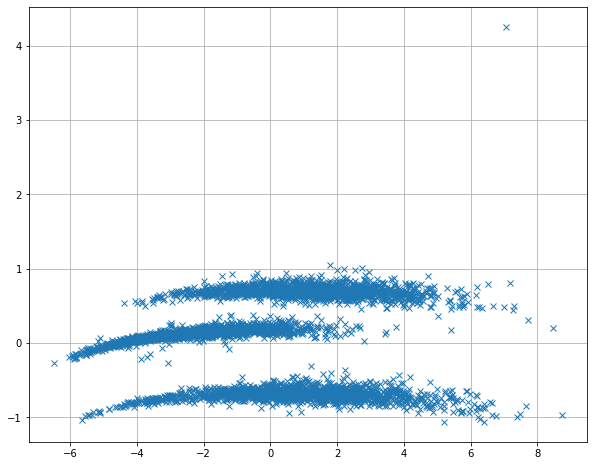


Grouped by 0-7 7-12 12-16 16-20 20+
PCA_all:

KNeighborsClassifier test error:  0.3014
GridSearchCV:  0.3002 49
KNeighborsClassifier:  0.3005 0.2739
RandomForestClassifier:  0.0 0.3278


In [266]:
from sklearn.decomposition import PCA

df2 = clear_df.copy()

df2.at[df2['Rings'] < 7, 'Rings'] = 0
df2.at[(df2['Rings'] >= 7)  & (df2['Rings'] < 12), 'Rings'] = 1
df2.at[(df2['Rings'] >= 12) & (df2['Rings'] < 16), 'Rings'] = 2
df2.at[(df2['Rings'] >= 16) & (df2['Rings'] < 20), 'Rings'] = 3
df2.at[df2['Rings'] >= 20, 'Rings'] = 4


# X = df2.drop(['Rings', 'I', 'M', 'F', 'Length', 'Shucked weight'], axis=1)
X = df2.drop(['Rings'], axis=1)
y = df2['Rings']

pca = PCA(n_components=2, random_state=42)
pca_X = pca.fit_transform(X)

print(pca.explained_variance_ratio_)
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X, y, test_size = 0.2, random_state = 42)


plt.figure(figsize=(10,8))
plt.plot(pca_X[:,0], pca_X[:,1], 'x')
plt.grid(True)
plt.show()


KNN_RF_with_stat(RESULT_MAP, 'PCA_all', 'Grouped by 0-7 7-12 12-16 16-20 20+', pca_X, y, isPCA=True)

[0.91 0.05]


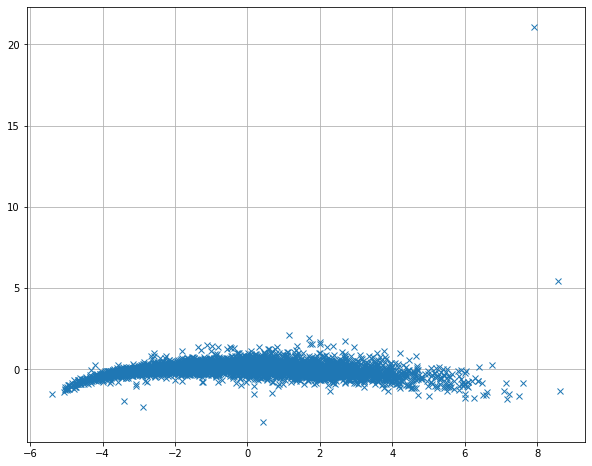


Grouped by 0-7 7-12 12-16 16-20 20+
PCA without Sex&Len:

KNeighborsClassifier test error:  0.3002
GridSearchCV:  0.3002 33
KNeighborsClassifier:  0.2936 0.2799
RandomForestClassifier:  0.0 0.3134


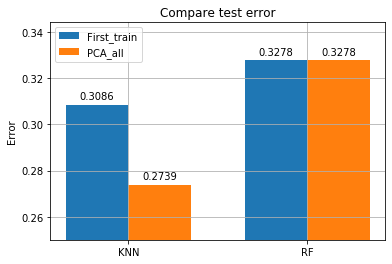

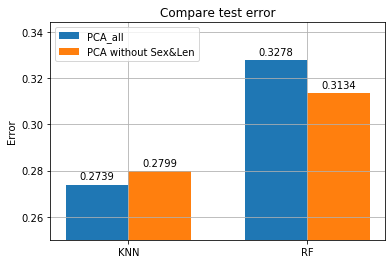

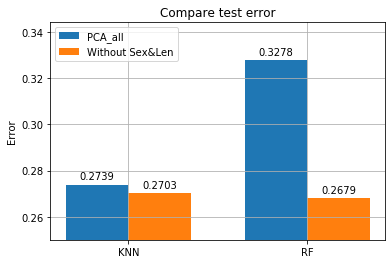

In [276]:
df2 = clear_df.copy()

df2.at[df2['Rings'] < 7, 'Rings'] = 0
df2.at[(df2['Rings'] >= 7)  & (df2['Rings'] < 12), 'Rings'] = 1
df2.at[(df2['Rings'] >= 12) & (df2['Rings'] < 16), 'Rings'] = 2
df2.at[(df2['Rings'] >= 16) & (df2['Rings'] < 20), 'Rings'] = 3
df2.at[df2['Rings'] >= 20, 'Rings'] = 4


X = df2.drop(['Rings', 'I', 'M', 'F', 'Length'], axis=1)
y = df2['Rings']

pca = PCA(n_components=2, random_state=42)
pca_X = pca.fit_transform(X)

print(pca.explained_variance_ratio_)
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X, y, test_size = 0.2, random_state = 42)


plt.figure(figsize=(10,8))
# plt.plot(pca_X[:,0], pca_X[:,1], 'x')

plt.scatter(pca_X[y == 0, 0], pca_X[y == 0, 1], color = 'red', s = 2)
plt.scatter(pca_X[y == 1, 0], pca_X[y == 1, 1], color = 'blue', s = 2)

plt.grid(True)
plt.show()


KNN_RF_with_stat(RESULT_MAP, 'PCA without Sex&Len', 'Grouped by 0-7 7-12 12-16 16-20 20+', pca_X, y, isPCA=True)

compare_KNN_RF(RESULT_MAP, 'First_train', 'PCA_all', 0.25)
compare_KNN_RF(RESULT_MAP, 'PCA_all', 'PCA without Sex&Len', 0.25)
compare_KNN_RF(RESULT_MAP, 'PCA_all', 'Without Sex&Len', 0.25)

Использование PCA с 2мя компонентами даёт неплохие результаты при использовании KNN. С RF результаты значительно хуже (32.8% vs 26.8)

Так же интересно отметить, что если сразу убрать некоторые признаки (Sex & Length) то результат RF с PCA немного улучшиться



Теперь попробуем с другим числом компонент

[0.91 0.05 0.02 0.02 0.01 0.  ]

Grouped by 0-7 7-12 12-16 16-20 20+
PCA without Sex&Len n_comp=1:

KNeighborsClassifier test error:  0.299
GridSearchCV:  0.299 43
KNeighborsClassifier:  0.2966 0.2787
RandomForestClassifier:  0.0003 0.4007


Grouped by 0-7 7-12 12-16 16-20 20+
PCA without Sex&Len n_comp=2:

KNeighborsClassifier test error:  0.3002
GridSearchCV:  0.3002 33
KNeighborsClassifier:  0.2936 0.2799
RandomForestClassifier:  0.0 0.3146


Grouped by 0-7 7-12 12-16 16-20 20+
PCA without Sex&Len n_comp=3:

KNeighborsClassifier test error:  0.2871
GridSearchCV:  0.2942 21
KNeighborsClassifier:  0.2748 0.2847
RandomForestClassifier:  0.0 0.2823


Grouped by 0-7 7-12 12-16 16-20 20+
PCA without Sex&Len n_comp=4:

KNeighborsClassifier test error:  0.2871
GridSearchCV:  0.2882 45
KNeighborsClassifier:  0.2787 0.2632
RandomForestClassifier:  0.0 0.2656


Grouped by 0-7 7-12 12-16 16-20 20+
PCA without Sex&Len n_comp=5:

KNeighborsClassifier test error:  0.2811
GridSearchCV:  0.2867 21
K

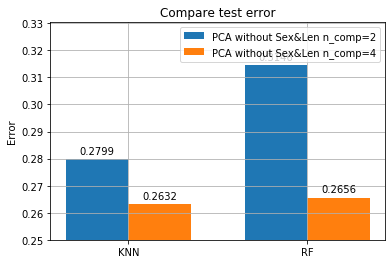

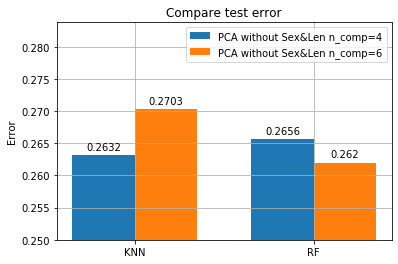

In [283]:
pca = PCA(n_components=6, random_state=42)
pca_X = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

for n_components in range(1, 7):
    pca = PCA(n_components=n_components, random_state=42)
    pca_X = pca.fit_transform(X)

    KNN_RF_with_stat(RESULT_MAP, 'PCA without Sex&Len n_comp=' + str(n_components), 'Grouped by 0-7 7-12 12-16 16-20 20+', pca_X, y, isPCA=True)
    print('\n' + '='*100)
    

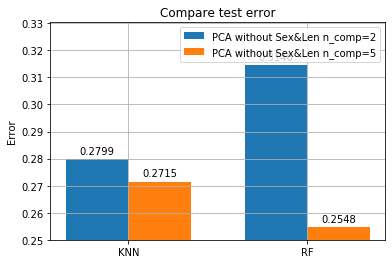

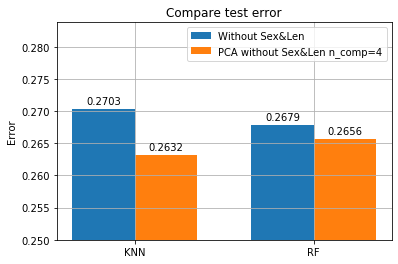

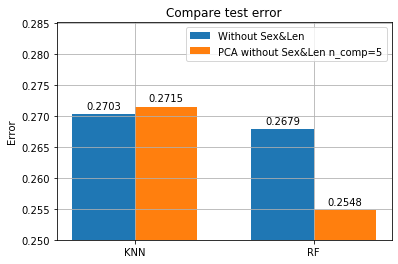

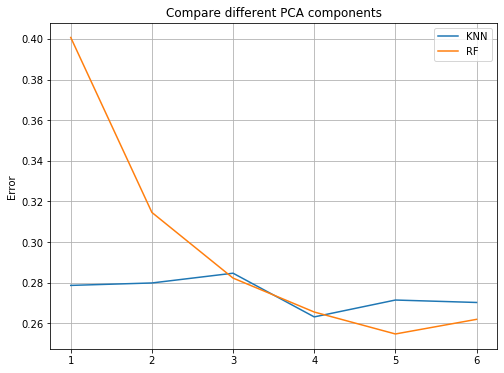

In [314]:
compare_KNN_RF(RESULT_MAP, 'PCA without Sex&Len n_comp=' + str(2), 'PCA without Sex&Len n_comp=' + str(5), 0.25)
compare_KNN_RF(RESULT_MAP, 'Without Sex&Len', 'PCA without Sex&Len n_comp=' + str(4), 0.25)
compare_KNN_RF(RESULT_MAP, 'Without Sex&Len', 'PCA without Sex&Len n_comp=' + str(5), 0.25)

pattern = 'PCA without Sex&Len n_comp='
pat_len = len(pattern)

y_plt = { 'KNN':[], 'RF':[] }
x_plt = { 'KNN':[], 'RF':[] }
for tag in RESULT_MAP:
    if tag[:pat_len] == pattern:
        for method in RESULT_MAP[tag]:
            x_plt[method].append(int(tag[pat_len]))
            y_plt[method].append(RESULT_MAP[tag][method]['test'])
            

labels = RESULT_MAP['PCA_all'].keys()
x = np.arange(1, len(x_plt['KNN']) + 1)
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x_plt['KNN'], y_plt['KNN'], label='KNN')
ax.plot(x_plt['RF'], y_plt['RF'], label='RF')


ax.set_ylabel('Error')
ax.set_title('Compare different PCA components')
ax.set_xticks(x)
ax.legend(loc='best')
plt.grid(True)


Как видно, до какого-то момента увеличение числа компонент способствовало уменьшению ошибки.

Для KNN лучший результат был достигнут с 4 компонентами, а для RF - с 5. При этом, использование PCA позволило улучшить уже имеющиеся результаты

Кроме того, смотря на explained_variance_ratio_: [0.91 0.05 0.02 0.02 0.01 0.  ]

Самый большой скачок произошёл между 2 и 3 компонентами, поэтому кажется что в качесте количества компонент стоит взять 2 или 3,

Но на деле наилучших результатов удалось добиться используя 4 и 5 компонентб при использовании которых ошибка уменьшилась на 2%

<font size="5">Task 3 -------------------------------------------------------------------------------</font>

In [348]:
from tqdm import tqdm_notebook as tqdm
from sklearn.neural_network import MLPClassifier

df2 = clear_df.copy()

df2.at[df2['Rings'] < 7, 'Rings'] = 0
df2.at[(df2['Rings'] >= 7)  & (df2['Rings'] < 12), 'Rings'] = 1
df2.at[(df2['Rings'] >= 12) & (df2['Rings'] < 16), 'Rings'] = 2
df2.at[(df2['Rings'] >= 16) & (df2['Rings'] < 20), 'Rings'] = 3
df2.at[df2['Rings'] >= 20, 'Rings'] = 4


X = df2.drop(['Rings', 'I', 'M', 'F', 'Length', 'Shucked weight'], axis=1)
y = df2['Rings']


# KNN_RF_with_stat(RESULT_MAP, 'Without Sex&Len&SWei', 'Grouped by 0-7 7-12 12-16 16-20 20+', X, y)

# compare_KNN_RF(RESULT_MAP, 'Without Sex&Len', 'Without Sex&Len&SWei', 0.25)





test_scores =[]
train_scores =[]
for i in tqdm(range(1, 100)):
    mlp_model = MLPClassifier(alpha = 0, hidden_layer_sizes = (i,), solver = 'lbfgs', 
                              activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)
    train_scores.append(mlp_model.score(X_train, y_train))
    test_scores.append(mlp_model.score(X_test, y_test))


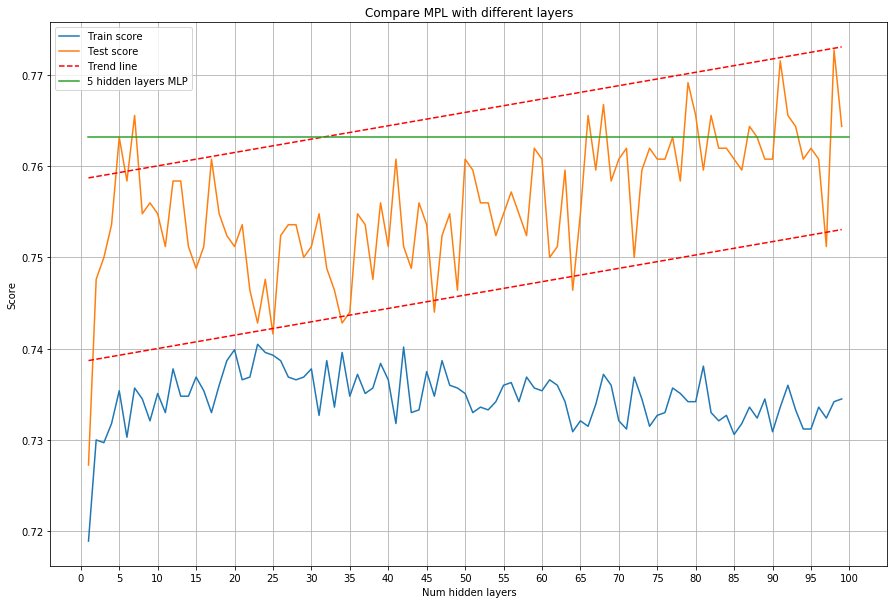

In [349]:
x = np.arange(0, 102, 5)

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(range(1, 100), train_scores, label = 'Train score')
ax.plot(range(1, 100), test_scores, label = 'Test score')

z = np.polyfit(range(1, 100), test_scores, 1)
p = np.poly1d(z)
ax.plot(range(1, 100), p(range(1, 100)) + 0.01, 'r--', label='Trend line')
ax.plot(range(1, 100), p(range(1, 100)) - 0.01, 'r--')
ax.plot([1, 100], [test_scores[4], test_scores[4]], label='5 hidden layers MLP')

ax.set_ylabel('Score')
ax.set_xlabel('Num hidden layers')
ax.set_title('Compare MPL with different layers')
ax.set_xticks(x)
ax.legend()
plt.grid(True)

Как видно, с увеличением кол-ва скрытых слоёв ошибка ведёт себя очень не стабильно: то резко уменьшается, то резко увеличивается, но тем не менее общая тенденция - с увеличением кол-ва слоёв уменьшается ошибка.


При этом интересно отметить, что MLP с 5 скрытыми слоями показывает хороший score, но при последующем увеличении числа слоёв (вплоть до 65) score просел

